In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_to_load = "JEOPARDY_CSV.csv"
df = pd.read_csv(file_to_load)
print(df.head())

   Show Number    Air Date      Round                         Category  Value  \
0         4680  12/31/2004  Jeopardy!                          HISTORY  $200    
1         4680  12/31/2004  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200    
2         4680  12/31/2004  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200    
3         4680  12/31/2004  Jeopardy!                 THE COMPANY LINE  $200    
4         4680  12/31/2004  Jeopardy!              EPITAPHS & TRIBUTES  $200    

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  


In [2]:
df_data = pd.DataFrame(df)
df_data

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


# A . How many rows are there in the dataframe? What does a row represent in this dataset? What is the "grain"?




In [3]:
print(len(df_data)) # The data rows represent questions and answers.
                    


216930


# B.Clean the data.How do you need to "clean it" What is "dirty"about this data?

In [4]:
# first we have to find where exactly we have to clean data for that isnull()method will help us. 
#Out put will be True/False boolean values that indicate which values are missing and which are not missing and also we will call sum to count the missing values.
data_clean = df_data.isnull().sum()
data_clean

find_missing = np.where(df_data.isnull())[0]
find_missing

Frame_missing = pd.DataFrame(df_data.iloc[[94817, 143297]])
Frame_missing

df_data = df_data.fillna("No Answer")
df_data.iloc[[94817, 143297]]

# checking 
df_data.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        0
dtype: int64

# C. How many unique shows were there each year?

In [5]:
df_data[" Air Date"]=pd.to_datetime(df_data[" Air Date"])
df_data["Year"]=df_data[" Air Date"].dt.year
data_grouped = df_data.groupby("Year")[" Round"].nunique()
data_grouped

Year
1984    3
1985    3
1986    3
1987    3
1988    3
1989    3
1990    3
1991    3
1992    3
1993    3
1994    3
1995    3
1996    3
1997    4
1998    3
1999    3
2000    3
2001    3
2002    4
2003    3
2004    3
2005    3
2006    3
2007    4
2008    3
2009    3
2010    3
2011    3
2012    3
Name:  Round, dtype: int64

# D. How many times was each category used?

In [6]:

category_count = pd.DataFrame(df_data[" Category"].value_counts())

category_count.columns = ["Times Used"]

category_count

,Times Used
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
POTPOURRI...NO FOOLIN',1
BRITISH PAINTERS,1
MIDWAY ISLAND,1
THE OXFORD ENGLISH DICTIONARY,1


# E. which month (over the years) has had the most shows?

In [79]:

df_data[" Air Date"]=pd.to_datetime(df_data[" Air Date"])
df_data["Month"]=df_data[" Air Date"].dt.month
data_grouped = df_data.groupby("Month")["Show Number"].nunique()
data_grouped_2 = pd.DataFrame(data_grouped)
data_grouped_3 = data_grouped_2.sort_values(["Show Number"], ascending=False).head(1)
data_grouped_3




,Show Number
Month,
11,434


# F. Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

In [57]:
data_answer = df_data[" Answer"].value_counts()
data_answer.head(3)

China        216
Australia    215
Japan        196
Name:  Answer, dtype: int64

In [61]:
data_answer_1 = pd.DataFrame(df_data[df_data[" Answer"]=='China'][[' Answer',' Question']])
data_answer_2 = pd.DataFrame(df_data[df_data[" Answer"]=='Australia'][[' Answer',' Question']])
data_answer_3 = pd.DataFrame(df_data[df_data[" Answer"]=='Japan'][[' Answer',' Question']])

data_answers = [ data_answer_1,data_answer_2, data_answer_3]

Questions = pd.concat(data_answers)
Questions

,Answer,Question
598,China,In 1958 this country launched its second 5-yea...
1507,China,"In 1999 this country began 3 ""golden weeks"" of..."
3050,China,P.F. Chang's is an upscale bistro specializing...
3476,China,This country's National People's Congress has ...
5990,China,"Of the 6 nations India borders, this one is th..."
...,...,...
211129,Japan,"On Feb. 8, 1904 this country attacked Port Art..."
214711,Japan,"This nation's maritime self-defense force, suc..."
215513,Japan,"On July 8, 1853 Matthew Perry presented a lett..."
215568,Japan,Kirin


# 2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

Text(0, 0.5, 'Times Used')

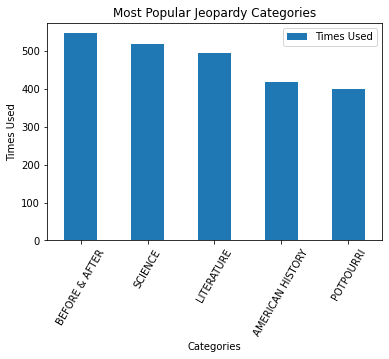

In [80]:
category_count = pd.DataFrame(df_data[" Category"].value_counts())

category_count.columns = ["Times Used"]

cat_count = category_count.head(5)

cat_count.plot.bar(title = "Most Popular Jeopardy Categories",rot = 60)
plt.xlabel("Categories")
plt.ylabel("Times Used")
